In [1]:
import pandas as pd
import numpy as np

In [2]:
base_cancer = pd.read_csv('Cancer_Data.csv')

In [ ]:
base_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
base_cancer.columns

In [3]:
base_cancer = base_cancer.drop('Unnamed: 32', axis=1)

In [ ]:
base_cancer.columns

In [4]:
base_cancer = base_cancer.drop('id', axis=1)

In [ ]:
base_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
type(base_cancer)

In [5]:
X_cancer = base_cancer.iloc[:, 1:].values

In [ ]:
X_cancer

In [6]:
y_cancer = base_cancer.iloc[:, 0].values

In [7]:
from sklearn.preprocessing import StandardScaler
scaler_cancer = StandardScaler()

In [8]:
X_cancer = scaler_cancer.fit_transform(X_cancer)

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder_diagnosis = LabelEncoder()

In [10]:
y_cancer = label_encoder_diagnosis.fit_transform(y_cancer)

In [ ]:
y_cancer

In [ ]:
len(np.unique(base_cancer['diagnosis']))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_cancer_treinamento, X_cancer_teste, y_cancer_treinamento, y_cancer_teste = train_test_split(X_cancer, y_cancer, test_size = 0.15, random_state = 0)

In [ ]:
X_cancer_treinamento.shape, y_cancer_treinamento.shape

((483, 30), (483,))

In [ ]:
X_cancer_teste.shape, y_cancer_teste.shape

((86, 30), (86,))

In [ ]:
import pickle

In [ ]:
with open('cancer.pkl', mode = 'wb') as f:
  pickle.dump([X_cancer_treinamento, X_cancer_teste, y_cancer_treinamento, y_cancer_teste], f)

###Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
with open('cancer.pkl', 'rb') as f:
  X_cancer_treinamento, X_cancer_teste, y_cancer_treinamento, y_cancer_teste = pickle.load(f)

In [ ]:
X_cancer_treinamento.shape, y_cancer_treinamento.shape

((483, 30), (483,))

In [ ]:
X_cancer_teste.shape, y_cancer_teste.shape

((86, 30), (86,))

In [ ]:
naive_cancer = GaussianNB()
naive_cancer.fit(X_cancer_treinamento, y_cancer_treinamento)
previsoes = naive_cancer.predict(X_cancer_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_cancer_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_cancer_teste, previsoes)

0.9186046511627907

In [ ]:
confusion_matrix(y_cancer_teste, previsoes)

array([[45,  5],
       [ 2, 34]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.9186046511627907

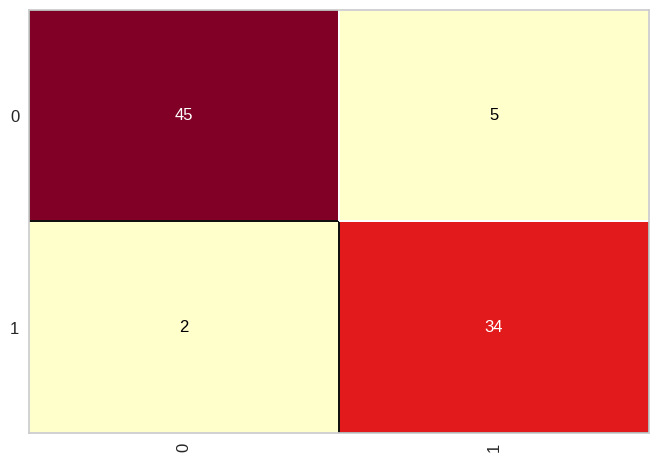

In [ ]:
cm = ConfusionMatrix(naive_cancer) 
cm.fit(X_cancer_treinamento, y_cancer_treinamento)
cm.score(X_cancer_teste, y_cancer_teste)

In [ ]:
print(classification_report(y_cancer_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.87      0.94      0.91        36

    accuracy                           0.92        86
   macro avg       0.91      0.92      0.92        86
weighted avg       0.92      0.92      0.92        86



### Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_cancer = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
arvore_cancer.fit(X_cancer_treinamento, y_cancer_treinamento)

In [ ]:
previsoes = arvore_cancer.predict(X_cancer_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_cancer_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
accuracy_score(y_cancer_teste, previsoes)

0.9069767441860465

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.9069767441860465

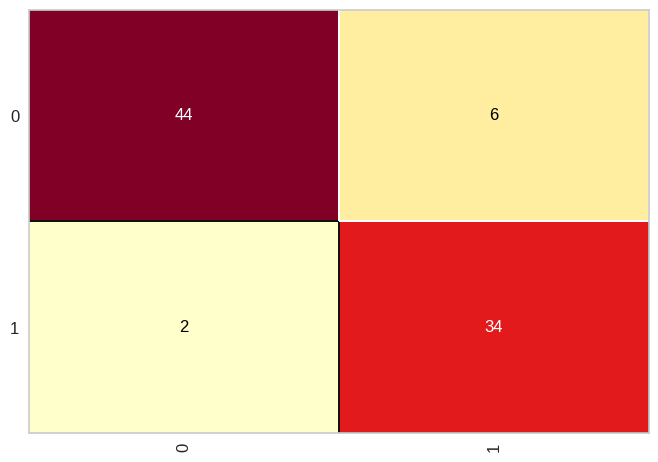

In [ ]:
cm = ConfusionMatrix(arvore_cancer)
cm.fit(X_cancer_treinamento, y_cancer_treinamento)
cm.score(X_cancer_teste, y_cancer_teste)

In [ ]:
print(classification_report(y_cancer_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        50
           1       0.85      0.94      0.89        36

    accuracy                           0.91        86
   macro avg       0.90      0.91      0.91        86
weighted avg       0.91      0.91      0.91        86



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_cancer = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)

In [ ]:
random_forest_cancer.fit(X_cancer_treinamento, y_cancer_treinamento)

In [ ]:
previsoes = random_forest_cancer.predict(X_cancer_teste) 
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_cancer_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
accuracy_score(y_cancer_teste, previsoes)

0.9651162790697675

0.9651162790697675

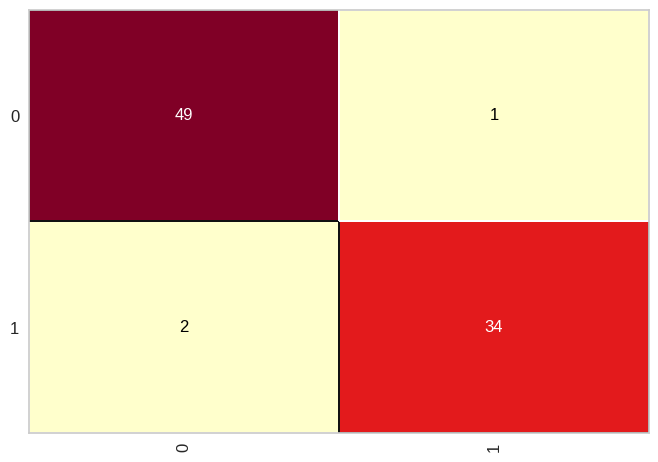

In [ ]:
cm = ConfusionMatrix(random_forest_cancer) 
cm.fit(X_cancer_treinamento, y_cancer_treinamento)
cm.score(X_cancer_teste, y_cancer_teste)

In [ ]:
print(classification_report(y_cancer_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.97      0.94      0.96        36

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.97        86



###kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
with open('cancer.pkl', 'rb') as f:
  X_cancer_treinamento, X_cancer_teste, y_cancer_treinamento, y_cancer_teste = pickle.load(f)

In [ ]:
X_cancer_treinamento.shape, y_cancer_treinamento.shape

((483, 30), (483,))

In [ ]:
X_cancer_teste.shape, y_cancer_teste.shape

((86, 30), (86,))

In [ ]:
knn_cancer = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn_cancer.fit(X_cancer_treinamento, y_cancer_treinamento)

In [ ]:
previsoes = knn_cancer.predict(X_cancer_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_cancer_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_cancer_teste, previsoes)

0.9651162790697675

0.9651162790697675

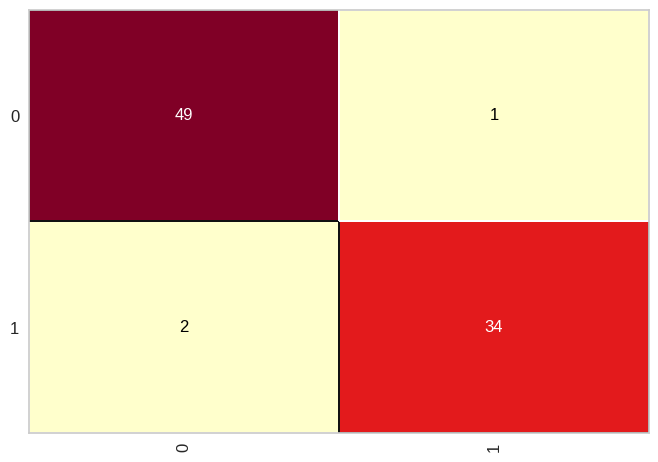

In [ ]:
from yellowbrick.classifier import ConfusionMatrix 
cm = ConfusionMatrix(knn_cancer) 
cm.fit(X_cancer_treinamento, y_cancer_treinamento)
cm.score(X_cancer_teste, y_cancer_teste)

In [ ]:
print(classification_report(y_cancer_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.97      0.94      0.96        36

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.97        86



###SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
with open('cancer.pkl', 'rb') as f:
  X_cancer_treinamento, X_cancer_teste, y_cancer_treinamento, y_cancer_teste = pickle.load(f)

In [ ]:
svm_cancer = SVC(kernel='linear', random_state=1)

In [ ]:
svm_cancer.fit(X_cancer_treinamento, y_cancer_treinamento)

In [ ]:
previsoes = svm_cancer.predict(X_cancer_teste)  
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_cancer_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_cancer_teste, previsoes)

1.0

1.0

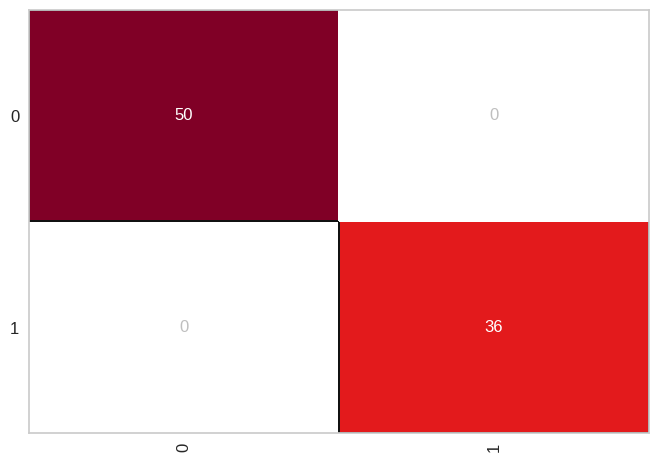

In [ ]:
from yellowbrick.classifier import ConfusionMatrix 
cm = ConfusionMatrix(svm_cancer) 
cm.fit(X_cancer_treinamento, y_cancer_treinamento)  
cm.score(X_cancer_teste, y_cancer_teste)

###Redes Neurais

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
with open('cancer.pkl', 'rb') as f:
  X_cancer_treinamento, X_cancer_teste, y_cancer_treinamento, y_cancer_teste = pickle.load(f)

In [ ]:
rede_neural_cancer = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_cancer.fit(X_cancer_treinamento, y_cancer_treinamento)

In [ ]:
previsoes = rede_neural_cancer.predict(X_cancer_teste) 
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_cancer_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_cancer_teste, previsoes)

0.9883720930232558

0.9883720930232558

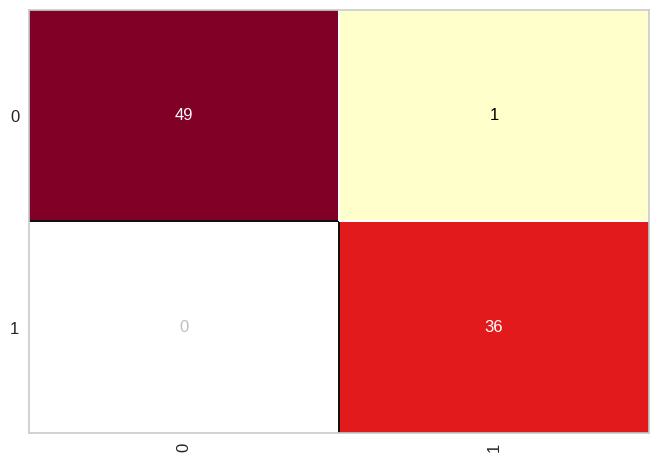

In [ ]:
from yellowbrick.classifier import ConfusionMatrix 
cm = ConfusionMatrix(rede_neural_cancer)
cm.fit(X_cancer_treinamento, y_cancer_treinamento)
cm.score(X_cancer_teste, y_cancer_teste)

###Tuning dos parâmetros com GridSearch

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open('cancer.pkl', 'rb') as f:  
  X_cancer_treinamento, y_cancer_treinamento, X_cancer_teste, y_cancer_teste = pickle.load(f)

In [ ]:
X_cancer_treinamento.shape, y_cancer_treinamento.shape

((483, 30), (86, 30))

In [ ]:
X_cancer_teste.shape, y_cancer_teste.shape

((483,), (86,))

###Na utilização de validação cruzada, nós utilizamos a base de dados inteira pois, durante o processo de validação cruzada o algoritmo fará a quebra da base de dados

In [15]:
X_cancer = np.concatenate((X_cancer_treinamento, X_cancer_teste), axis = 0)  # Concatenando a base de dados para que ela fique completa (axis = 0 -> linhas)
X_cancer.shape

(569, 30)

In [ ]:
X_cancer

In [16]:
y_cancer = np.concatenate((y_cancer_treinamento, y_cancer_teste), axis = 0)  # Concatenando a base de dados para que ela fique completa (axis = 0 -> linhas)
y_cancer.shape

(569,)

In [ ]:
y_cancer

###Árvore de decisão

In [17]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],  
              'min_samples_split': [2, 5, 10],  
              'min_samples_leaf': [1, 5, 10]}

In [18]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_cancer, y_cancer)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
0.9489986027014439


###Random Forest

In [19]:
parametros = {'criterion': ['gini', 'entropy'],  
              'n_estimators': [10, 40, 100, 150],  
              'min_samples_split': [2, 5, 10],  
              'min_samples_leaf': [1, 5, 10]}

In [20]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros) 
grid_search.fit(X_cancer, y_cancer)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.968390001552554


###kNN

In [21]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [22]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_cancer, y_cancer)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 3, 'p': 1}
0.9683744760130415


###SVM

In [23]:
parametros = {'tol': [0.001, 0.0001, 0.00001],  
              'C': [1.0, 1.5, 2.0],  
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [24]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)  
grid_search.fit(X_cancer, y_cancer)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'kernel': 'linear', 'tol': 0.001}
0.9807017543859649


###Redes neurais

In [25]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_cancer, y_cancer)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [27]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'logistic', 'batch_size': 10, 'solver': 'sgd'}
0.9754230709517155
